In [1]:
# Imports

# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

In [2]:
# Constants

PATH = "Wilshire_Stocks/"

# Start end date defaults
S_DATE = '2017-02-01'
E_DATE = '2022-12-06'
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

In [3]:
# Get Stock File Names in a List



files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 3263 total stocks
tickers.sort()
len(tickers)

3262

In [4]:
# Function that Returns a Dataframe from CSV



# Reads a dataframe from the CSV file, changes index to date and returns it
def get_stock_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col=0)
    except FileNotFoundError as ex:
        print(ex)
    else:
        return df



In [5]:
# Merge Multiple Stocks in one Dataframe by Column Name

def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_stock_df_from_csv(x)
        
        # NEW Check if your dataframe has duplicate indexes
        # if not df.index.is_unique:
        #     # Delete duplicates 
        #     df = df.loc[~df.index.duplicated(), :]
        
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [6]:
# Plotting an Efficient Frontier

In [7]:
# Stock Portfolio

# 1ST LIST port_list = ['CALX', 'NOVT', 'BLDR', 'DXCM', 'RGEN', 'PFE', 'LLY',
# 'AMD', 'NVDA', 'NFLX', 'DAR', 'COST', 'BJ', 'WMT', 'BOOT', 'WING',
# 'LULU', 'NEE', 'AWK', 'MSCI', 'KKR', 'LPX', 'SHW', 'NXRT', 'NSA',
# 'CBRE', 'AES']

# 2ND LIST port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
# 'AMD', 'NFLX', 'COST', 'BJ', 'WING',
# 'LULU', 'NEE', 'MSCI', 'KKR', 'SHW', 'NSA',
# 'CBRE']
port_list = ['CALX', 'NOVT', 'RGEN', 'LLY',
'AMD', 'NFLX', 'COST', 'BJ', 'WING',
'MSCI', 'CBRE']
num_stocks = len(port_list)
num_stocks

11

In [8]:
# Merge All Data by Closing Price

mult_df = merge_df_by_column_name('Close',  S_DATE, 
                                  E_DATE, *port_list)
mult_df

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-02-06,7.150000,22.950001,29.110001,69.873695,13.630000,140.970001,149.109604,NaN,24.142883,88.405006,31.020000
2017-02-07,7.000000,23.299999,29.240000,69.756989,13.290000,144.000000,149.547043,NaN,23.900116,88.006065,30.950001
2017-02-08,6.900000,23.500000,29.090000,70.125076,13.560000,144.740005,150.755447,NaN,24.226603,87.968086,30.780001
2017-02-09,7.000000,24.000000,30.270000,69.756989,13.420000,144.139999,153.029037,NaN,24.486107,85.802345,31.570000
2017-02-10,7.400000,24.400000,30.070000,69.837791,13.580000,144.820007,153.959961,NaN,24.519598,86.647743,34.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,46.799999,132.630005,189.990005,245.100006,105.239998,384.359985,492.429993,57.930000,150.550003,508.130005,98.330002
2022-01-31,50.279999,138.100006,198.339996,245.389999,114.250000,427.140015,505.130005,61.470001,153.250000,536.119995,101.339996
2022-02-01,52.060001,139.869995,202.889999,248.279999,116.779999,457.130005,508.410004,61.660000,156.550003,545.400024,101.529999


In [10]:
# Plot Price of Investments Over Total Dataset

# Plot out prices for each stock since beginning of 2017
fig = px.line(mult_df, x=mult_df.index, y=mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=800, width=1000, 
                  showlegend=True)
fig.show()

In [11]:
# Cumulative Return for All Stocks

mult_cum_df = merge_df_by_column_name('cum_return',  S_DATE, 
                                  E_DATE, *port_list)
mult_cum_df

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-07,0.979021,1.015250,1.004466,0.998330,0.975055,1.021494,1.002934,NaN,0.989945,0.995487,0.997743
2017-02-08,0.965035,1.023965,0.999313,1.003598,0.994864,1.026743,1.011038,NaN,1.003468,0.995058,0.992263
2017-02-09,0.979021,1.045752,1.039849,0.998330,0.984593,1.022487,1.026286,NaN,1.014216,0.970560,1.017730
2017-02-10,1.034965,1.063181,1.032978,0.999486,0.996332,1.027311,1.032529,NaN,1.015604,0.980123,1.096067
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,6.545454,5.779085,6.526623,3.507758,7.721203,2.726537,3.302470,2.633182,6.235792,5.747751,3.169890
2022-01-31,7.032168,6.017429,6.813466,3.511908,8.382245,3.030006,3.387642,2.794091,6.347626,6.064362,3.266924
2022-02-01,7.281119,6.094553,6.969770,3.553268,8.567865,3.242747,3.409640,2.802727,6.484313,6.169334,3.273050


In [13]:
# Plot out cumulative returns for each stock since beginning of 2017
fig = px.line(mult_cum_df, x=mult_cum_df.index, y=mult_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=800, width=1000, 
                  showlegend=True)
fig.show()

In [15]:
# Mean Returns

returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

CALX    0.386939
NOVT    0.353465
RGEN    0.384411
LLY     0.251157
AMD     0.435869
NFLX    0.211700
COST    0.250907
BJ      0.282939
WING    0.366390
MSCI    0.362618
CBRE    0.238682
dtype: float64

In [16]:
# Correlation

# We want great performing stocks that go up when others go down to smooth the returns over the year
returns.corr()

,CALX,NOVT,RGEN,LLY,AMD,NFLX,COST,BJ,WING,MSCI,CBRE
CALX,1.000000,0.369959,0.229957,0.135734,0.258900,0.219911,0.241079,0.150248,0.248821,0.331309,0.318629
NOVT,0.369959,1.000000,0.371875,0.270159,0.414330,0.359159,0.373853,0.194379,0.332225,0.502868,0.411074
RGEN,0.229957,0.371875,1.000000,0.285680,0.378718,0.339358,0.304092,0.198963,0.280199,0.419744,0.172984
LLY,0.135734,0.270159,0.285680,1.000000,0.226871,0.221616,0.359300,0.211223,0.137627,0.313727,0.258185
AMD,0.258900,0.414330,0.378718,0.226871,1.000000,0.398259,0.320223,0.195482,0.272484,0.442430,0.295300
NFLX,0.219911,0.359159,0.339358,0.221616,0.398259,1.000000,0.348728,0.164617,0.254699,0.431951,0.193867
COST,0.241079,0.373853,0.304092,0.359300,0.320223,0.348728,1.000000,0.396802,0.239313,0.440361,0.327144
BJ,0.150248,0.194379,0.198963,0.211223,0.195482,0.164617,0.396802,1.000000,0.087996,0.168504,0.082975
WING,0.248821,0.332225,0.280199,0.137627,0.272484,0.254699,0.239313,0.087996,1.000000,0.376216,0.224414
MSCI,0.331309,0.502868,0.419744,0.313727,0.442430,0.431951,0.440361,0.168504,0.376216,1.000000,0.445044


In [17]:
# Generate Random Weights Equal to 1

# Generate 11 random values that sum to 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.07243535 0.17019293 0.13109027 0.09602133 0.07003261 0.1112583
 0.09126959 0.0224934  0.0523517  0.00985357 0.17300096]
Total Weight : 1.0000000000000002


In [18]:
# Calculating Return of Portfolio Using Random Weighting

# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.3100836562142585

In [19]:
# Calculating Volitility

np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.23823577815990277

In [20]:
# Analyzing Returns and Risks of 10,000 combinations

p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.31631881, 0.31693921, 0.32184285, ..., 0.31011893, 0.31780174,
        0.30807431]),
 array([0.24562499, 0.23239916, 0.26068402, ..., 0.23993469, 0.2349098 ,
        0.23817051]),
 array([1.23692145, 1.3099841 , 1.18665827, ..., 1.24041642, 1.2996552 ,
        1.24101977]),
 array([[0.118686  , 0.00182519, 0.17389926, ..., 0.09338526, 0.01264465,
         0.00250942],
        [0.02240211, 0.11775146, 0.11472148, ..., 0.02467342, 0.15197299,
         0.03193988],
        [0.14052887, 0.08649081, 0.07899959, ..., 0.01076156, 0.0870799 ,
         0.10278367],
        ...,
        [0.08086182, 0.13147579, 0.08207968, ..., 0.15595306, 0.0346641 ,
         0.11421238],
        [0.07361609, 0.03153714, 0.11840538, ..., 0.11520181, 0.11199749,
         0.18191526],
        [0.03878573, 0.22981567, 0.08164145, ..., 0.00457679, 0.02015037,
         0.09111515]]))

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

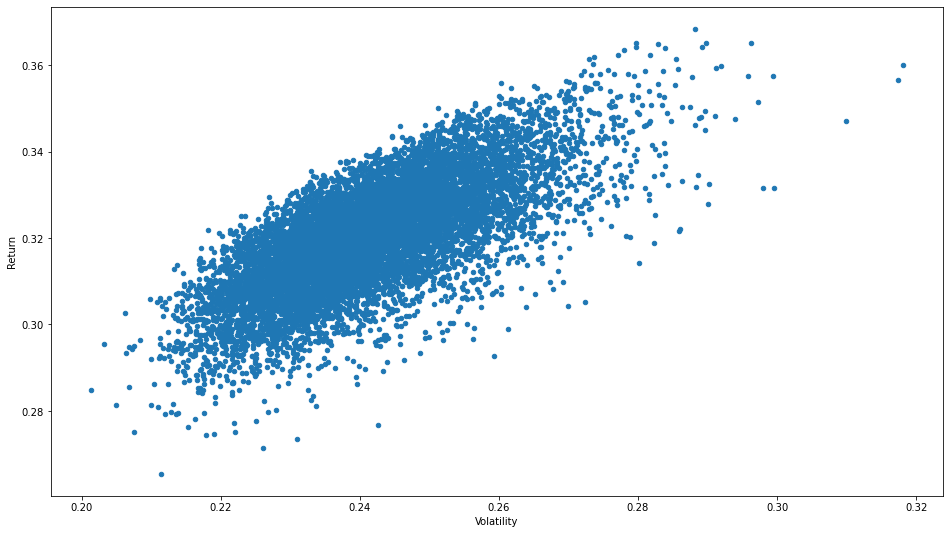

In [21]:
# Plotting the Efficient Frontier

# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

In [22]:
# Sharpe Ratio

# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])

Stock : CALX : 4.28
Stock : NOVT : 11.74
Stock : RGEN : 5.15
Stock : LLY : 13.03
Stock : AMD : 4.21
Stock : NFLX : 0.76
Stock : COST : 19.70
Stock : BJ : 7.80
Stock : WING : 17.31
Stock : MSCI : 14.60
Stock : CBRE : 1.40

Volatility : 0.21818153200580045
Return : 0.32180713860762516


In [23]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

In [24]:
# Get Portfolio Weighting

def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

In [25]:
# Returns the Value of Portfolio by Date

def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

In [26]:
# Approximate Portfolio Weighting Based on Request

port_list = ["CALX", "NOVT", "RGEN", "LLY", "AMD", "NFLX",
"COST", "BJ", "WING", "MSCI", "CBRE"]

port_wts = [7, 8, 15, 14, 3, 3, 17, 6, 11, 14, 1]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Close',  '2022-01-07', 
                                  '2022-01-07', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()

# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(105.64, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date(E_DATE, tot_shares, port_list)

Shares : [12, 5, 7, 5, 2, 1, 3, 9, 7, 2, 1]
Share Cost : [716.8800201416016, 799.5999908447266, 1447.5299530029297, 1297.5, 264.0, 541.0599975585938, 1608.5399780273438, 591.2100219726562, 1146.25, 1104.0, 104.77999877929688]
Total Investment : 9621.349960327148
Stock Weights : [0.07450929683439411, 0.08310683990726997, 0.15044977669159748, 0.13485633568575464, 0.02743897697189921, 0.05623535156600794, 0.16718443717981646, 0.061447720372968716, 0.11913608846227072, 0.11474481279157851, 0.01089036353644225]


[]